# TITLE : MODELS OF DENSITY FROM COMPOSITIONAL DATA MWC7+ PRESSURE TEMP USING MACHINE LEARNING ALGORITHM

OBJECTIVE : TRINING OF MODELS FOR FUTURE SELECTION FOR PREDICTION OF DENSITY USING WIDE RANGE OF COMPOSITION DATA.

THIS FILE PREAPRED SEPRATED FROM TRAINING BECAUSE TO EDIT GRAPH AND DATA TABLE USED FOR PREDICTION NEED TO MANY TIME RE RUN THIS.

TO AVOID TRINING MULTIPAL TIMES THIS IS DONE IN SEPERATED FILES. HOWEVER REVIEWER CAN CROSS VERIFY SAME TRAINED MODELS USED FOR TESTING BY MATCHING HYPER PARAMETER OPTIMIZED DURING TRAINING USED HERE OR NOT. 

ALGORITHM APPLIED : LINEAR REGRESSION, SUPPORT VECTOR MACHINE, KNN, RANDOM FOREST, DECISION TREE, ANN , XGB

In [1]:
#DATA EXTRACTION, MANIPULATION, VIZULIZATION LIBRARY
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#STATISTICAL TOOLS LIBRARY
import scipy.stats as stat
import pylab 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#DATA FETURES OPERATION LIBRARY
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

#MODELING LIBRARY
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

#MODELLING OF DEEP LEARNING MODEL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch


#MODEL EVALUATION LIBRARY
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score



#Model saving and loading files
import pickle
from keras.models import load_model


<ipython-input-1-f0bc94e4555e>:33: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [2]:
path = "C:\\STUDY DRIVE\\DENSITY PAPER THESIS\\DENSITY TREND\\MODEL 1\\DATASOURCE\\"
train_file_name = "TRAIN.xlsx"
test_file_name = "TEST.xlsx"
model_path = "C:\\STUDY DRIVE\\DENSITY PAPER THESIS\\DENSITY TREND\\MODEL 1\\MODELS\\"
train = pd.read_excel(path+train_file_name)
test = pd.read_excel(path+test_file_name)

export_data_path = "C:\\STUDY DRIVE\\DENSITY PAPER THESIS\\DENSITY TREND\\MODEL 1\\EXPORTED DATA\\"

figure_path = "C:\\STUDY DRIVE\\DENSITY PAPER THESIS\\DENSITY TREND\\MODEL 1\\FIGURES\\"


In [3]:
test.columns

Index(['Sr.No', 'H2S', 'N2', 'CO2', 'C1', 'C2', 'C3-C6', 'C7+', 'MWC7+',
       'Temp', 'P', 'Density', 'Ref. Name'],
      dtype='object')

In [4]:
train.columns

Index(['Sr.No', 'H2S', 'N2', 'CO2', 'C1', 'C2', 'C3-C6', 'C7+', 'MWC7+',
       'Temp', 'P', 'Density'],
      dtype='object')

In [5]:
X_train = train.drop(["Density",'Sr.No'],axis = 1)
y_train = train.Density
X_test = test.drop(["Density",'Sr.No','Ref. Name'],axis = 1)
y_test = test.Density

                              #### Load Models For testing purpose  ####

In [6]:
#All File Name variable
scaler_file = 'scaler.sav'
svr_file    = 'svr_model.sav'
knn_file    = 'knn_model.sav'
xgb_file    = 'xgb_model.sav'


In [7]:
scaler            = pickle.load(open(model_path+scaler_file , "rb"))
svr_regression    = pickle.load(open(model_path+svr_file , "rb"))
knn_regression    = pickle.load(open(model_path+knn_file , "rb"))
xgb_regression    = pickle.load(open(model_path+xgb_file , "rb"))


                              #### First Scale All Inputs with scaler model  ####

In [8]:
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

## 1. SVR MODEL

In [9]:
svr_regression_test_Prediction = svr_regression.predict(x_test)
svr_regression_train_Prediction = svr_regression.predict(x_train)


In [10]:
svr_regression_trainR2 = svr_regression.score(x_train,y_train)
svr_regression_testR2 = svr_regression.score(x_test,y_test)
print(svr_regression_trainR2 , svr_regression_testR2)

0.9811817745024297 0.8868980782439781


In [11]:
result_svr_train = pd.DataFrame()
result_svr_train["Density (train)"] = y_train
result_svr_train["Predicted Density (train)"] = svr_regression_train_Prediction
result_svr_train["Residues"] = abs(result_svr_train["Density (train)"] - result_svr_train["Predicted Density (train)"])
result_svr_train["Absolute Error (%)"] = result_svr_train["Residues"]*100/result_svr_train["Density (train)"]

result_svr_test = pd.DataFrame()
result_svr_test["Density (test)"] = y_test
result_svr_test["Predicted Density (test)"] = svr_regression_test_Prediction
result_svr_test["Residues"] = abs(result_svr_test["Density (test)"] - result_svr_test["Predicted Density (test)"])
result_svr_test["Absolute Error (%)"] = result_svr_test["Residues"]*100/result_svr_test["Density (test)"]




In [12]:
result_svr_train.describe()

,Density (train),Predicted Density (train),Residues,Absolute Error (%)
count,198.000000,198.000000,198.000000,198.000000
mean,564.428534,568.958710,17.671721,6.616585
std,217.332192,213.521938,23.978565,21.052600
min,28.600000,36.113587,0.084147,0.012228
25%,420.500000,412.645866,2.783992,0.466216
50%,607.956497,624.639482,10.540907,1.793213
75%,733.736473,743.324395,22.724751,4.886732
max,877.071303,878.198212,171.197045,204.081495


In [13]:
result_svr_test.describe()

,Density (test),Predicted Density (test),Residues,Absolute Error (%)
count,44.000000,44.000000,44.000000,44.000000
mean,661.239659,648.446832,17.951983,2.681200
std,65.776086,55.336783,12.631956,1.724715
min,547.046000,563.875832,0.610599,0.096230
25%,611.160750,600.991429,9.861841,1.571545
50%,657.469500,640.627339,16.087784,2.344915
75%,728.200250,687.796049,22.942653,3.422414
max,762.777000,758.695513,52.908878,7.306716


In [14]:
import matplotlib as mpl

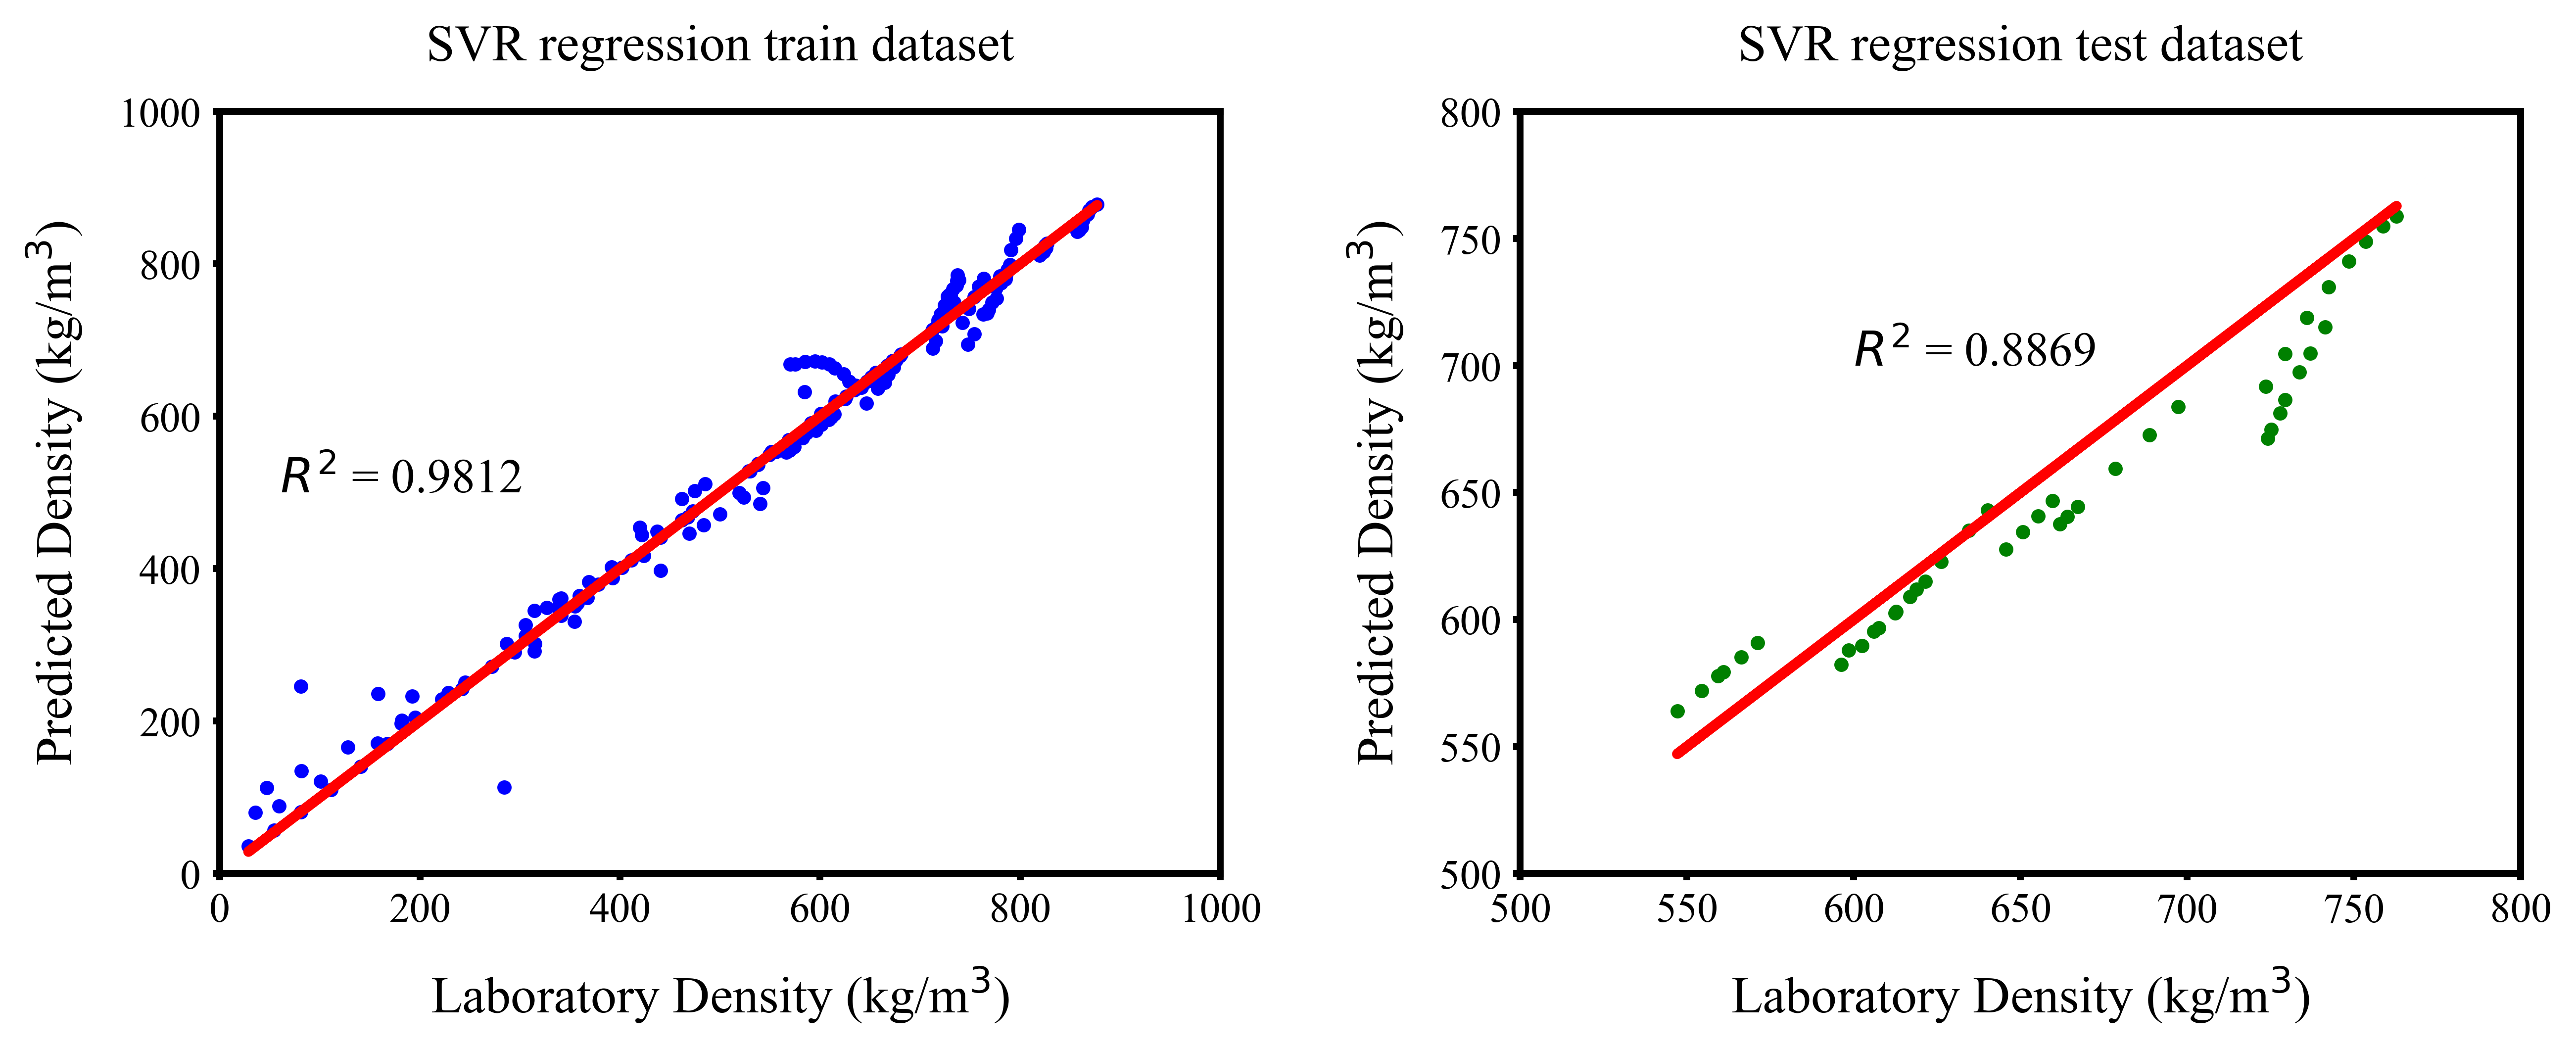

In [52]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
fig_svr = plt.figure(figsize=(12,4) , dpi = 500)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , svr_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(svr_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("SVR regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 60,500 , "$R^2$ = {:.4f}".format(svr_regression_trainR2) , fontsize = 14)
plt.xlim((0,1000))
plt.ylim((0,1000))

ax2 = plt.subplot(122)
plt.scatter(y_test , svr_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(svr_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("SVR regression test dataset" , pad = 15 , fontsize = 15)
plt.text( 600,700 , "$R^2$ = {:.4f}".format(svr_regression_testR2) , fontsize = 14)
plt.xlim((500,800))
plt.ylim((500,800))
for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)  

#fig_svr.savefig(figure_path + "Svr Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [16]:
svr_MSE_train = mean_squared_error(y_train,svr_regression_train_Prediction)
svr_MAE_train = mean_absolute_error(y_train,svr_regression_train_Prediction)
svr_MSE_test  = mean_squared_error(y_test,svr_regression_test_Prediction)
svr_MAE_test  = mean_absolute_error(y_test,svr_regression_test_Prediction)
print(svr_MSE_train , svr_MAE_train , svr_MSE_test ,  svr_MAE_test )

884.3574215887016 17.671720942269896 478.21349073095894 17.95198252533859


## 2. KNN Model

In [17]:
knn_regression_test_Prediction = knn_regression.predict(x_test)
knn_regression_train_Prediction =knn_regression.predict(x_train)


In [18]:
knn_regression_trainR2 = knn_regression.score(x_train,y_train)
knn_regression_testR2 = knn_regression.score(x_test,y_test)
print(knn_regression_trainR2 , knn_regression_testR2)

0.979941211009848 0.8011300609684462


In [19]:
result_knn_train = pd.DataFrame()
result_knn_train["Density (train)"] = y_train
result_knn_train["Predicted Density (train)"] = knn_regression_train_Prediction
result_knn_train["Residues"] = abs(result_knn_train["Density (train)"] - result_knn_train["Predicted Density (train)"])
result_knn_train["Absolute Error (%)"] = result_knn_train["Residues"]*100/result_knn_train["Density (train)"]

result_knn_test = pd.DataFrame()
result_knn_test["Density (test)"] = y_test
result_knn_test["Predicted Density (test)"] = knn_regression_test_Prediction
result_knn_test["Residues"] = abs(result_knn_test["Density (test)"] - result_knn_test["Predicted Density (test)"])
result_knn_test["Absolute Error (%)"] = result_knn_test["Residues"]*100/result_knn_test["Density (test)"]




In [20]:
result_knn_train.describe()

,Density (train),Predicted Density (train),Residues,Absolute Error (%)
count,198.000000,198.000000,198.000000,198.000000
mean,564.428534,562.823213,16.010766,7.125812
std,217.332192,213.504105,26.263978,20.585429
min,28.600000,68.750000,0.075000,0.014526
25%,420.500000,409.800000,2.236518,0.318630
50%,607.956497,605.151515,6.968674,1.141971
75%,733.736473,731.503011,18.919103,4.605811
max,877.071303,871.339121,210.375000,150.000000


In [21]:
result_knn_test.describe()

,Density (test),Predicted Density (test),Residues,Absolute Error (%)
count,44.000000,44.000000,44.000000,44.000000
mean,661.239659,659.665067,22.771598,3.542510
std,65.776086,57.797686,18.160523,2.987869
min,547.046000,584.784743,0.761637,0.115083
25%,611.160750,604.675331,8.009496,1.154196
50%,657.469500,662.574637,15.416086,2.370961
75%,728.200250,714.823139,42.282416,5.895322
max,762.777000,757.061750,57.629331,10.534641


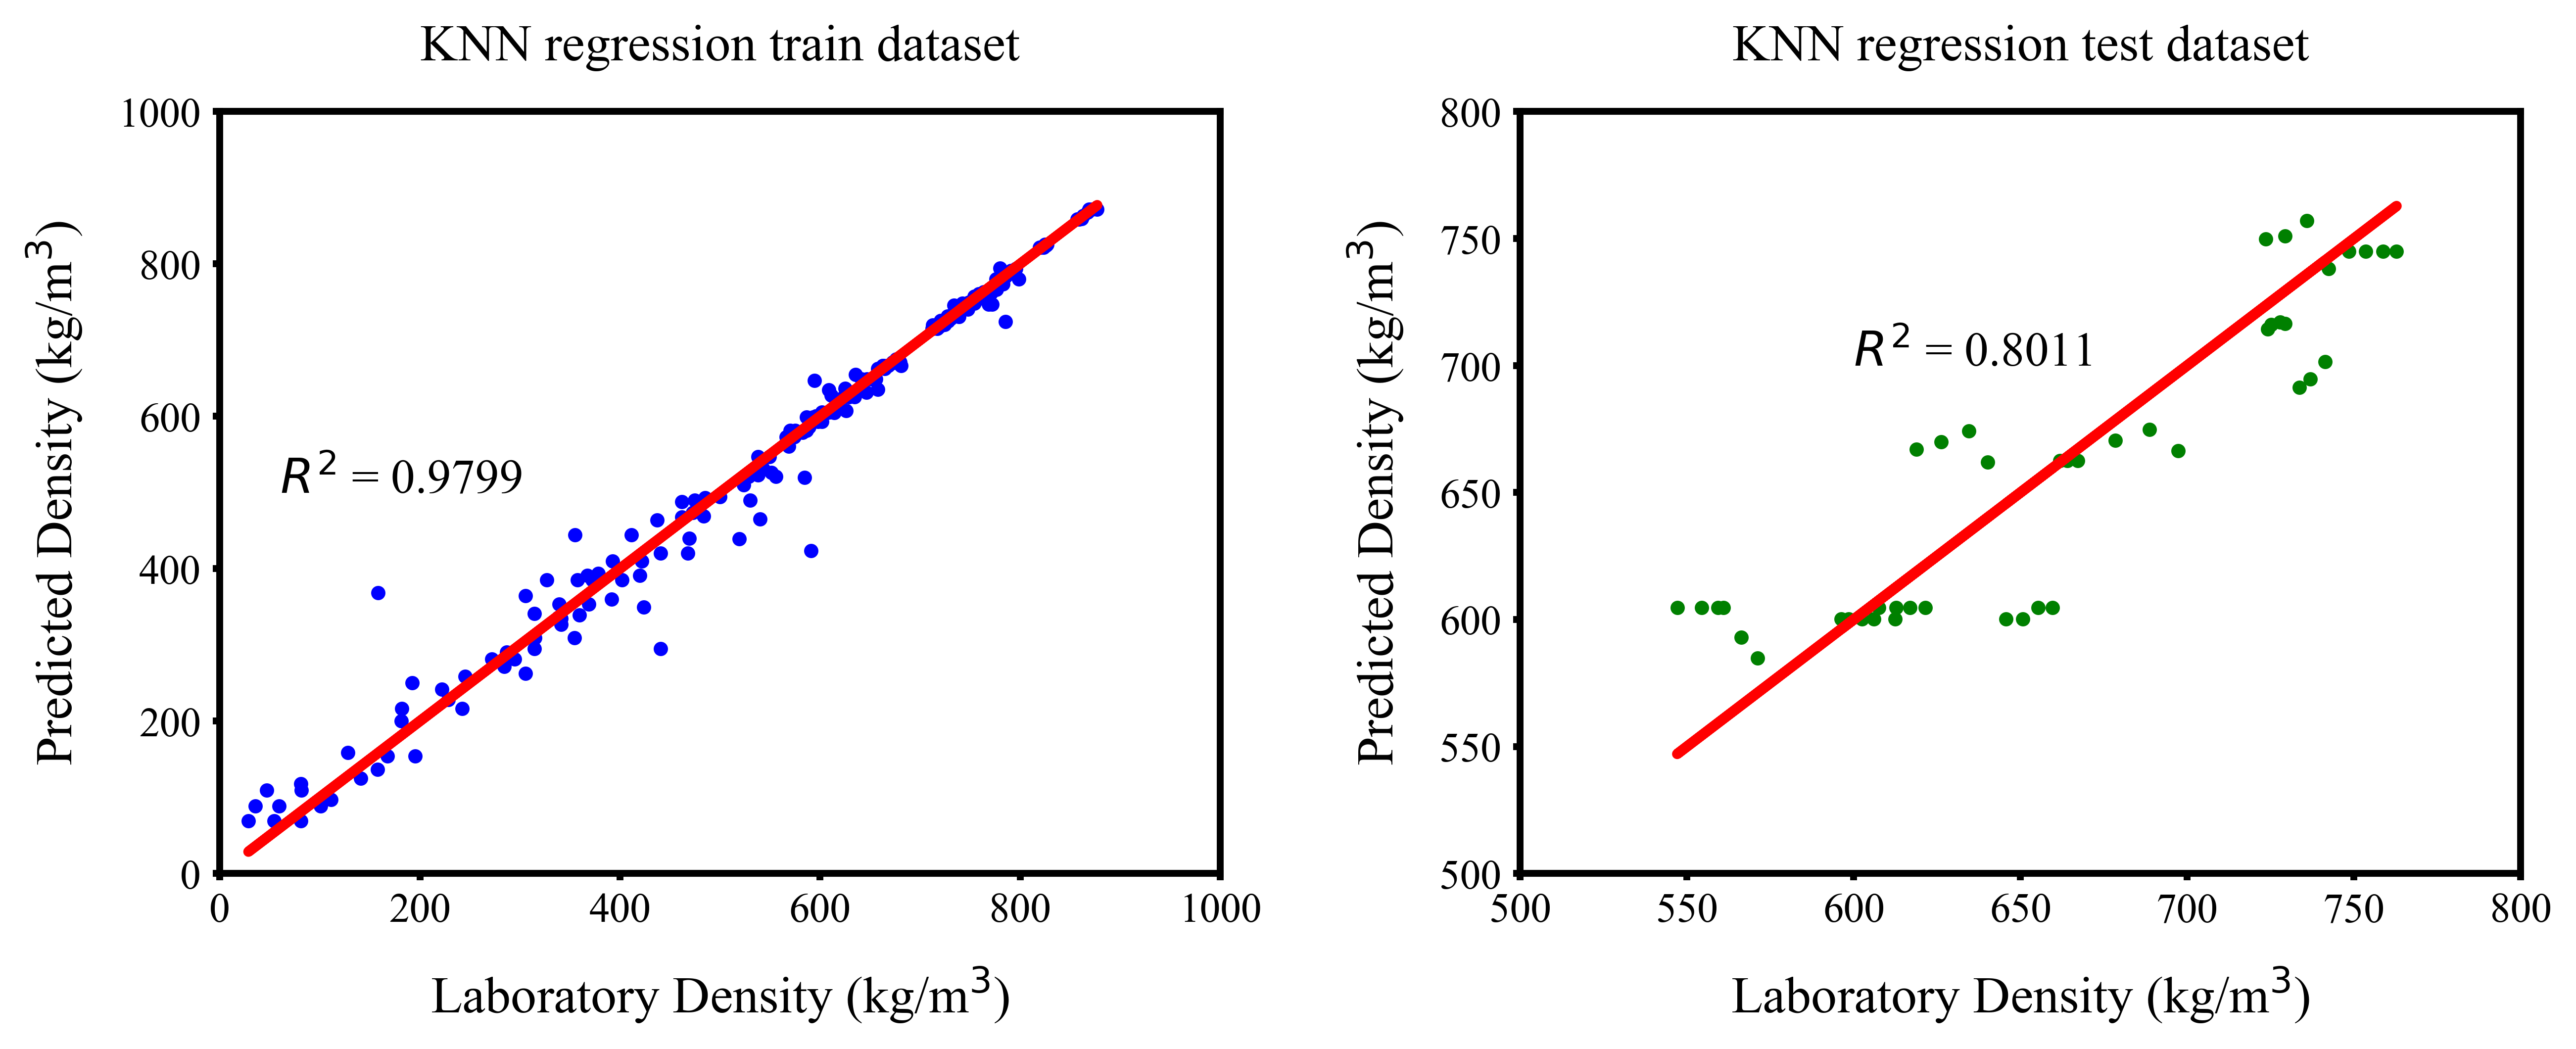

In [53]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"


fig_knn = plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , knn_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(knn_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("KNN regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 60,500 , "$R^2$ = {:.4f}".format(knn_regression_trainR2) , fontsize = 14)
plt.xlim((0,1000))
plt.ylim((0,1000))


ax2 = plt.subplot(122)
plt.scatter(y_test , knn_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(knn_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("KNN regression test dataset" , pad = 15 , fontsize = 15)
plt.text( 600,700 , "$R^2$ = {:.4f}".format(knn_regression_testR2) , fontsize = 14)
plt.xlim((500,800))
plt.ylim((500,800))

for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)   

#fig_knn.savefig(figure_path + "KNN Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [23]:
knn_MSE_train = mean_squared_error(y_train,knn_regression_train_Prediction)
knn_MAE_train = mean_absolute_error(y_train,knn_regression_train_Prediction)
knn_MSE_test  = mean_squared_error(y_test,knn_regression_test_Prediction)
knn_MAE_test  = mean_absolute_error(y_test,knn_regression_test_Prediction)
print(knn_MSE_train , knn_MAE_train , knn_MSE_test , knn_MAE_test )

942.657367657382 16.01076589598733 840.8547464903601 22.771598368129247


## 3. XGB Model

In [24]:
xgb_regression_test_Prediction = xgb_regression.predict(x_test)
xgb_regression_train_Prediction = xgb_regression.predict(x_train)


In [25]:
from sklearn.metrics import r2_score
xgb_regression_trainR2 = r2_score(y_train , xgb_regression_train_Prediction)
xgb_regression_testR2 = r2_score(y_test , xgb_regression_test_Prediction)
print(xgb_regression_trainR2 , xgb_regression_testR2)

0.9996855877254371 0.7821387436479805


In [26]:
result_xgb_train = pd.DataFrame()
result_xgb_train["Density (train)"] = y_train
result_xgb_train["Predicted Density (train)"] = xgb_regression_train_Prediction
result_xgb_train["Residues"] = abs(result_xgb_train["Density (train)"] - result_xgb_train["Predicted Density (train)"])
result_xgb_train["Absolute Error (%)"] = result_xgb_train["Residues"]*100/result_xgb_train["Density (train)"]

result_xgb_test = pd.DataFrame()
result_xgb_test["Density (test)"] = y_test
result_xgb_test["Predicted Density (test)"] = xgb_regression_test_Prediction
result_xgb_test["Residues"] = abs(result_xgb_test["Density (test)"] - result_xgb_test["Predicted Density (test)"])
result_xgb_test["Absolute Error (%)"] = result_xgb_test["Residues"]*100/result_xgb_test["Density (test)"]




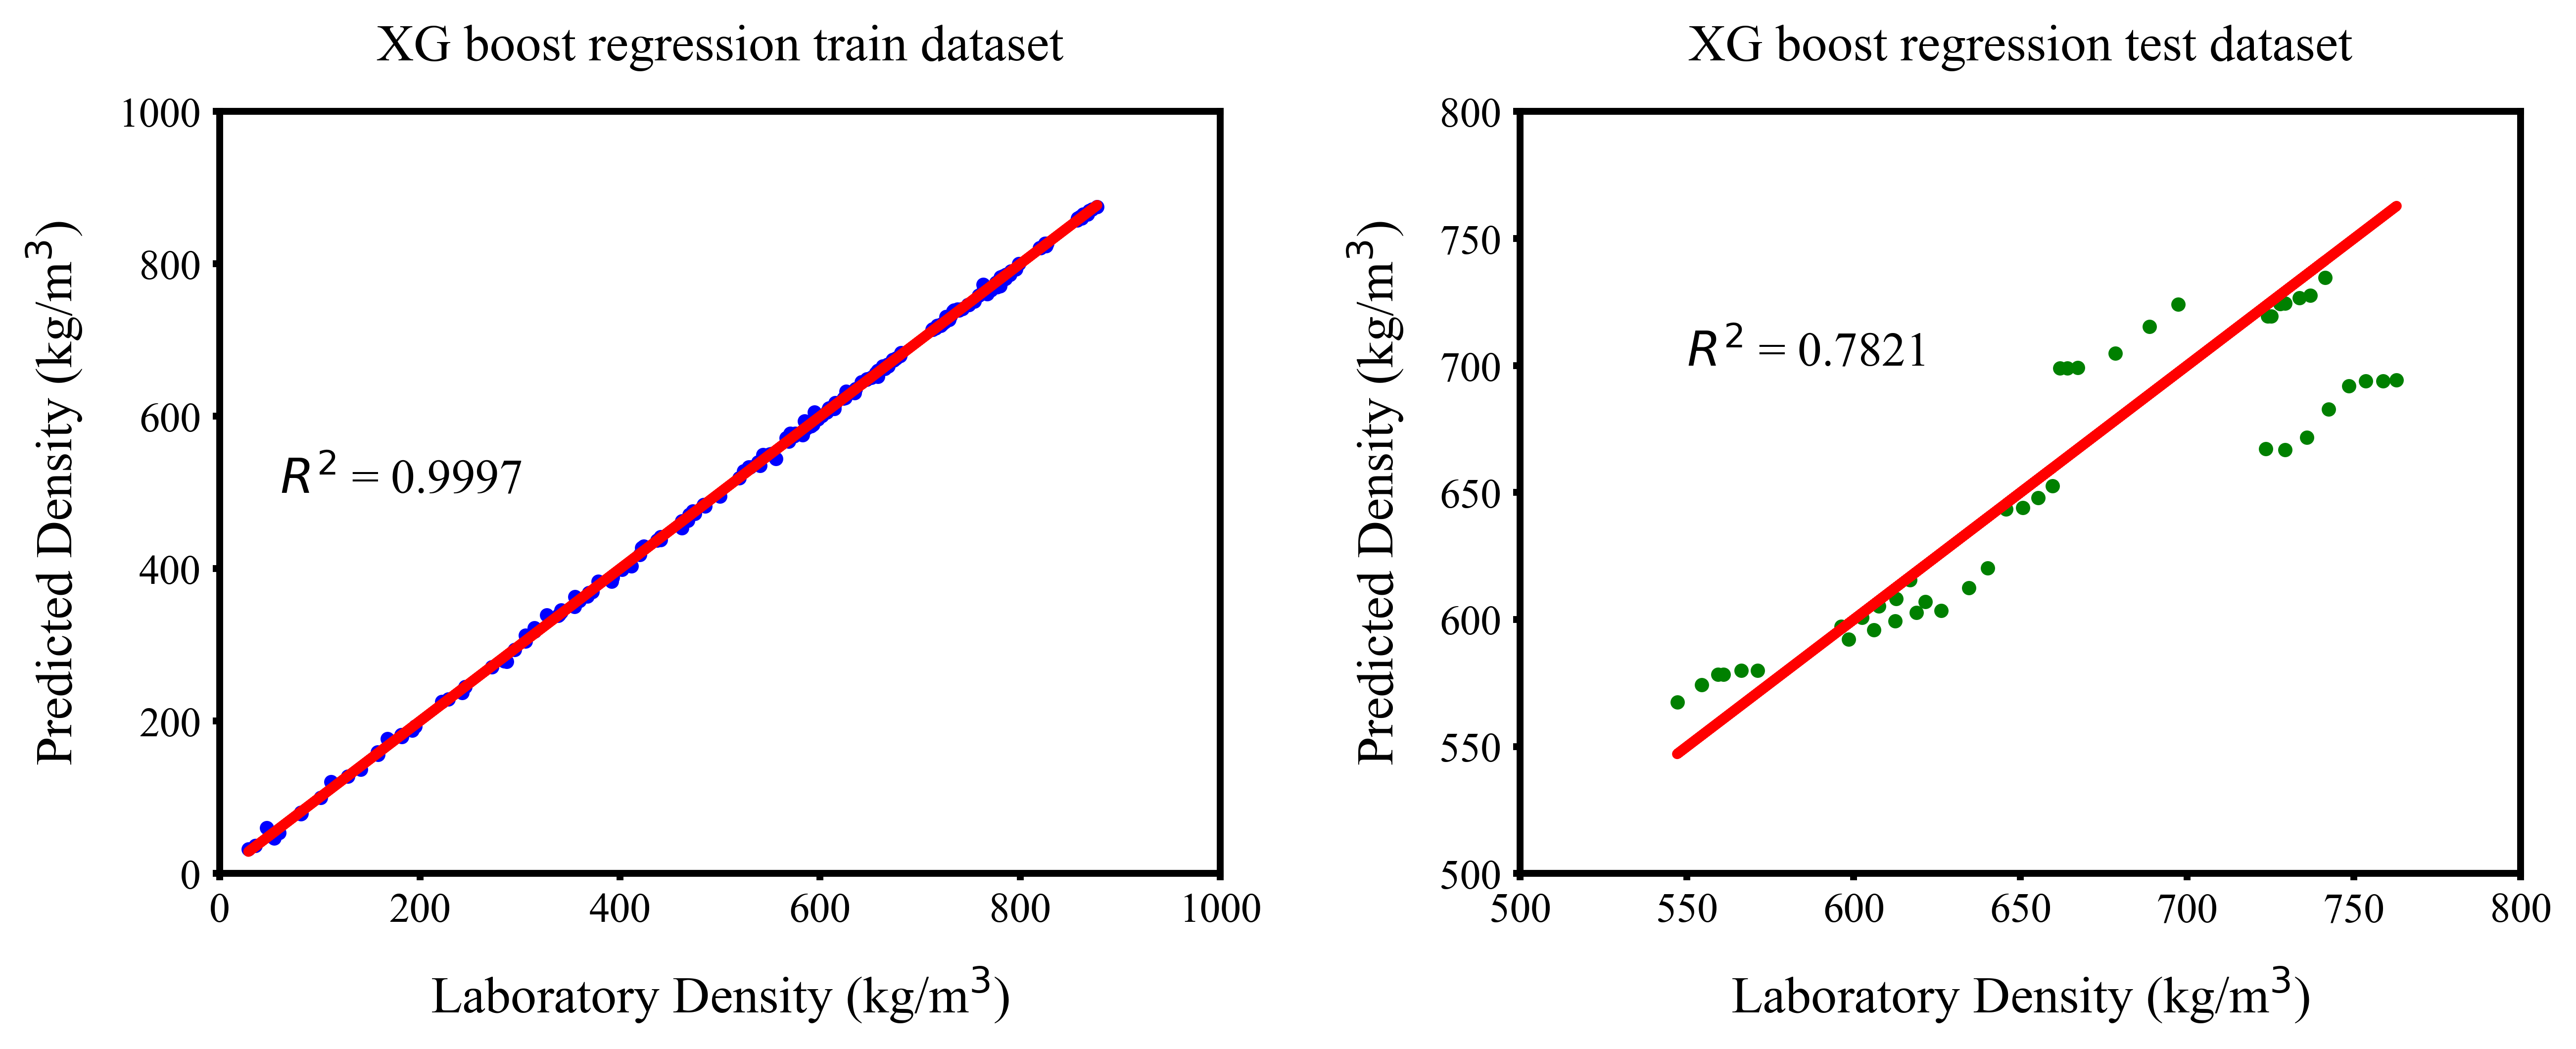

In [54]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"


fig_xgb= plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , xgb_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(xgb_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("XG boost regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 60,500 , "$R^2$ = {:.4f}".format(xgb_regression_trainR2) , fontsize = 14)
plt.xlim((0,1000))
plt.ylim((0,1000))


ax2 = plt.subplot(122)
plt.scatter(y_test , xgb_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(xgb_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("XG boost regression test dataset" , pad = 15 , fontsize = 15)
plt.text(  550,700, "$R^2$ = {:.4f}".format(xgb_regression_testR2) , fontsize = 14)
plt.xlim((500,800))
plt.ylim((500,800))

for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)  

#fig_xgb.savefig(figure_path + "XGB Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [28]:
xgb_MSE_train = mean_squared_error(y_train,xgb_regression_train_Prediction)
xgb_MAE_train = mean_absolute_error(y_train,xgb_regression_train_Prediction)
xgb_MSE_test  = mean_squared_error(y_test,xgb_regression_test_Prediction)
xgb_MAE_test  = mean_absolute_error(y_test,xgb_regression_test_Prediction)
print(xgb_MSE_train , xgb_MAE_train , xgb_MSE_test , xgb_MAE_test )

14.77571987242715 2.7864535346712107 921.1531535235334 22.18507159978694


In [29]:
result_xgb_train.describe()

,Density (train),Predicted Density (train),Residues,Absolute Error (%)
count,198.000000,198.000000,198.000000,198.000000
mean,564.428534,564.428467,2.786454,0.976985
std,217.332192,217.198181,2.654616,2.554717
min,28.600000,31.916096,0.016536,0.002105
25%,420.500000,420.933647,0.834791,0.153591
50%,607.956497,607.547638,1.915399,0.315627
75%,733.736473,738.570999,4.085556,0.912346
max,877.071303,874.585999,12.862117,27.483156


In [30]:
result_xgb_test.describe()

,Density (test),Predicted Density (test),Residues,Absolute Error (%)
count,44.000000,44.000000,44.000000,44.000000
mean,661.239659,651.980713,22.185072,3.232529
std,65.776086,54.859684,20.951180,2.797773
min,547.046000,567.537231,0.978860,0.164155
25%,611.160750,602.236725,6.494346,0.948959
50%,657.469500,650.208466,15.287028,2.512056
75%,728.200250,698.990372,28.032611,4.114597
max,762.777000,734.587646,68.417503,8.969529


In [31]:
model_comp_test = pd.DataFrame({
    'Model Name' : [ 'SVM'  , 'KNN' ,"XGB"],
    'R Square' : [svr_regression_testR2 ,knn_regression_testR2,xgb_regression_testR2],
    'MSE' : [svr_MSE_test,knn_MSE_test,xgb_MSE_test],
    'MAE' : [svr_MAE_test ,knn_MAE_test,xgb_MAE_test],
    '%AAD' : [result_svr_test.describe()["Absolute Error (%)"].loc["mean"],
              result_knn_test.describe()["Absolute Error (%)"].loc["mean"],
             
              result_xgb_test.describe()["Absolute Error (%)"].loc["mean"]
             ]

})

In [32]:
model_comp_test

,Model Name,R Square,MSE,MAE,%AAD
0,SVM,0.886898,478.213491,17.951983,2.681200
1,KNN,0.801130,840.854746,22.771598,3.542510
2,XGB,0.782139,921.153154,22.185072,3.232529


In [33]:
model_comp_train = pd.DataFrame({
    'Model Name' : ['SVM' ,'KNN',"XGB"],
    'R Square' : [svr_regression_trainR2 ,knn_regression_trainR2,xgb_regression_trainR2],
    'MSE' : [svr_MSE_train , knn_MSE_train,xgb_MSE_train],
    'MAE' : [svr_MAE_train ,knn_MAE_train,xgb_MSE_train],
    '%AAD' : [result_svr_train.describe()["Absolute Error (%)"].loc["mean"],
              result_knn_train.describe()["Absolute Error (%)"].loc["mean"],
             result_xgb_train.describe()["Absolute Error (%)"].loc["mean"]]
})

In [34]:
model_comp_train

,Model Name,R Square,MSE,MAE,%AAD
0,SVM,0.981182,884.357422,17.671721,6.616585
1,KNN,0.979941,942.657368,16.010766,7.125812
2,XGB,0.999686,14.775720,14.775720,0.976985


In [35]:
## Final File For prediction values and graph visualization for each crude for each model

## 1. Visulization of Result with SVR

In [36]:
svr_test_result = test[["P","Density","Ref. Name","Temp"]]
svr_test_result["Density Predicted"] = result_svr_test["Predicted Density (test)"]

<ipython-input-36-108dfe06e943>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svr_test_result["Density Predicted"] = result_svr_test["Predicted Density (test)"]


In [37]:
svr_test_result.head()

,P,Density,Ref. Name,Temp,Density Predicted
0,391.0,640.205,CRUDE 3,387.35,643.094243
1,351.8,634.518,CRUDE 3,387.35,635.128599
2,300.3,626.174,CRUDE 3,387.35,622.782874
3,260.7,618.812,CRUDE 3,387.35,611.847606
4,450.6,571.102,CRUDE 4,388.15,590.768287


In [38]:
Ref_name_list = svr_test_result["Ref. Name"].unique()

In [39]:
Ref_name_list

array(['CRUDE 3', 'CRUDE 4', 'CRUDE 5', 'CRUDE 6', 'CRUDE 7', 'CRUDE 8',
       'CRUDE 9', 'CRUDE 10'], dtype=object)

In [40]:
svr_test_result[svr_test_result["Ref. Name"] == 'CRUDE 3'][["Temp"]].values[0][0]

387.35

<ipython-input-51-ba347271d200>:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig1.savefig(figure_path + "svrJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-51-ba347271d200>:80: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig1.savefig(figure_path + "svrJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


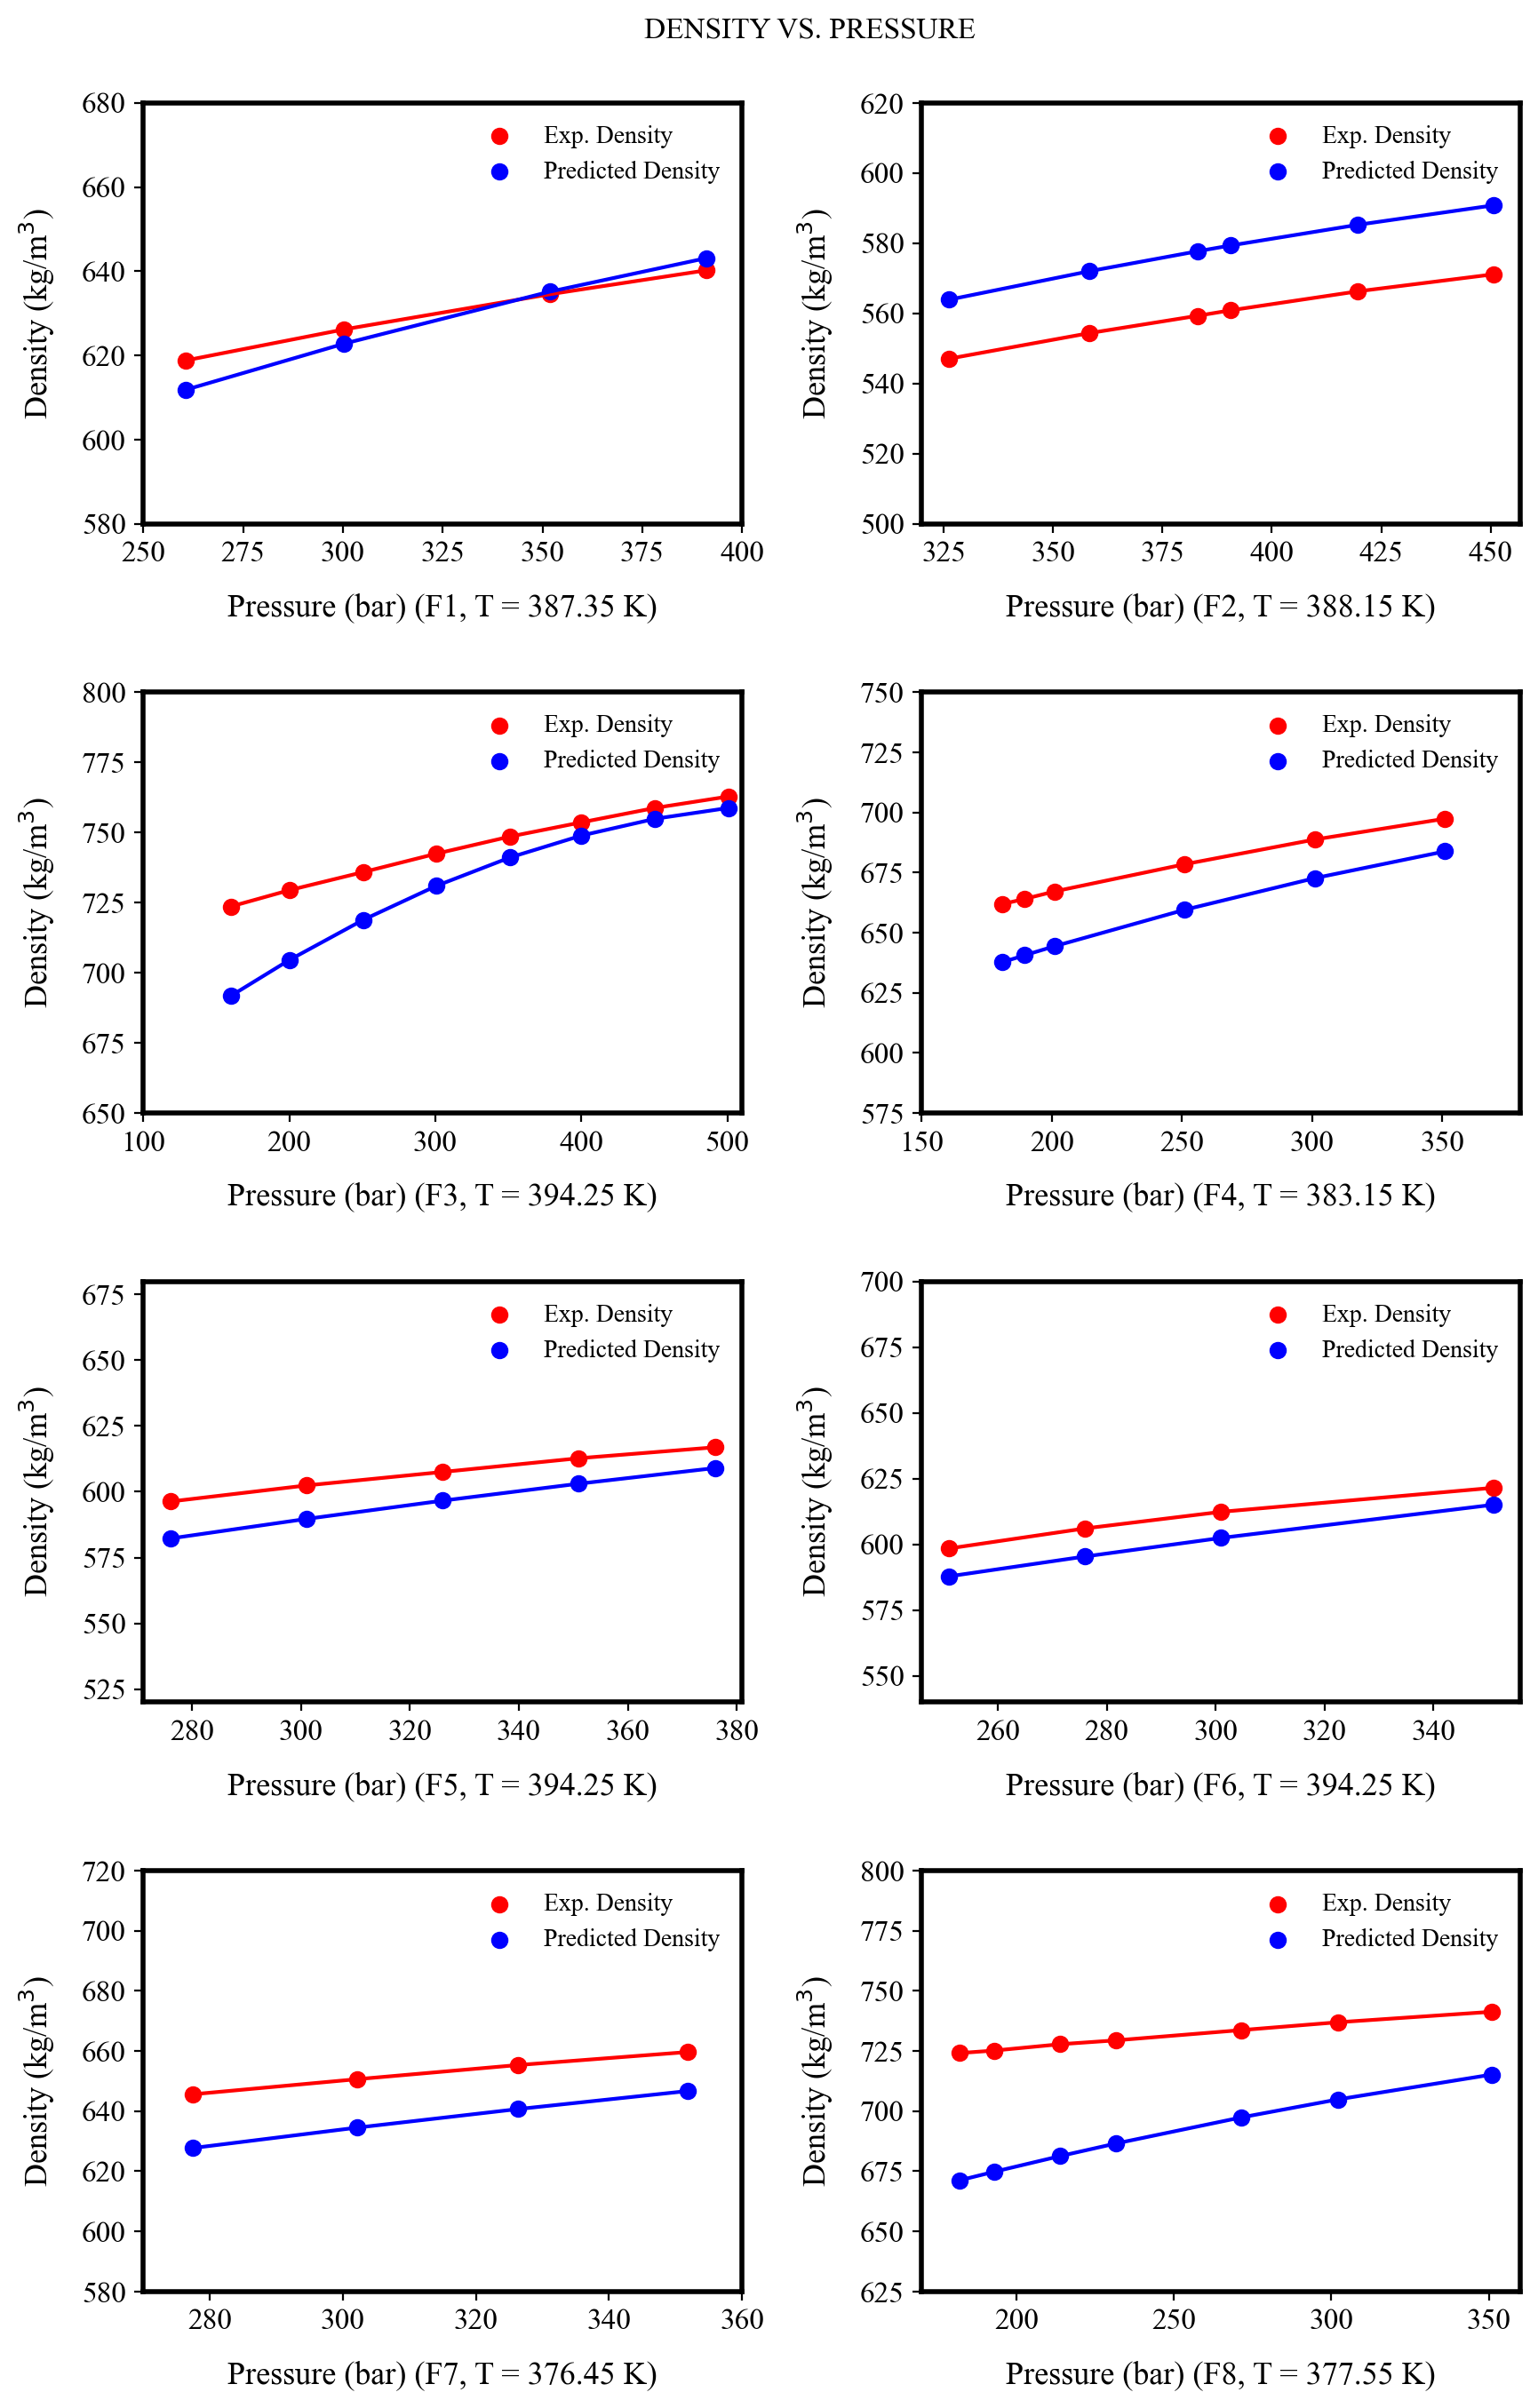

In [51]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
fig1 = plt.figure(figsize=(10,16) , dpi = 200)
plt.suptitle("DENSITY VS. PRESSURE" , fontsize = 12 , c = "black", y=0.91)

for i,j in enumerate(Ref_name_list , 1):
    locals()["ax"+str(i)] = plt.subplot(4,2,i)
    plt.scatter(svr_test_result[svr_test_result["Ref. Name"] == j]["P"],svr_test_result[svr_test_result["Ref. Name"] == j]["Density"],c = "red",label = "Exp. Density")
    plt.plot(svr_test_result[svr_test_result["Ref. Name"] == j]["P"],svr_test_result[svr_test_result["Ref. Name"] == j]["Density"],c = "red")
    plt.scatter(svr_test_result[svr_test_result["Ref. Name"] == j]["P"],svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"],c = "blue",label = "Predicted Density")
    plt.plot(svr_test_result[svr_test_result["Ref. Name"] == j]["P"],svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"],c = "blue")
    plt.legend(fontsize = 8)
  
    #plt.ylim((round(min(svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"])-50), round(max(svr_test_result[svr_test_result["Ref. Name"] == j]["Density"])+50)))
    #plt.yticks((min(svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"])-50, max(svr_test_result[svr_test_result["Ref. Name"] == j]["Density"])+50))
    #plt.xlim((min(svr_test_result[svr_test_result["Ref. Name"] == j]["P"])-5, max(svr_test_result[svr_test_result["Ref. Name"] == j]["P"])+5))

    plt.xlabel("Pressure (bar)" + " " + "(F" + str(i)+"," +" " + "T = " + str(svr_test_result[svr_test_result["Ref. Name"] == j][["Temp"]].values[0][0]) + " K)", fontsize = 13,labelpad = 10)
    plt.ylabel("Density (kg/m$^{3}$)",fontsize = 13,labelpad = 10)
    plt.legend(frameon=False )
    
#Changing Border thickness of all subplots
for i in range(1,9,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)

ax1.set_xlim(250,400)


#ax2.set_xlim(0.0,0.06)


ax3.set_xlim(100,510)


ax4.set_xlim(150,380)


#ax5.set_xlim(0,0.6)


#ax6.set_xlim(0,0.4)


ax7.set_xlim(270,360)


ax8.set_xlim(170,360)

##Set y limit for axis ##

ax1.set_ylim(580,680)


ax2.set_ylim(500,620)


ax3.set_ylim(650,800)


ax4.set_ylim(575,750)


ax5.set_ylim(520,680)


ax6.set_ylim(540,700)


ax7.set_ylim(580,720)


ax8.set_ylim(625,800)
        
plt.subplots_adjust(wspace=0.3,hspace = 0.4)  

fig1.savefig(figure_path + "svrJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


## 2. Visulization of Result with KNN

In [42]:
knn_test_result = test[["P","Density","Ref. Name"]]
knn_test_result["Density Predicted"] = result_knn_test["Predicted Density (test)"]

<ipython-input-42-d6e9f48c9340>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  knn_test_result["Density Predicted"] = result_knn_test["Predicted Density (test)"]


In [43]:
Ref_name_list = knn_test_result["Ref. Name"].unique()

<ipython-input-49-5ba2a26555d7>:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig2.savefig(figure_path + "knnJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-49-5ba2a26555d7>:80: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig2.savefig(figure_path + "knnJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


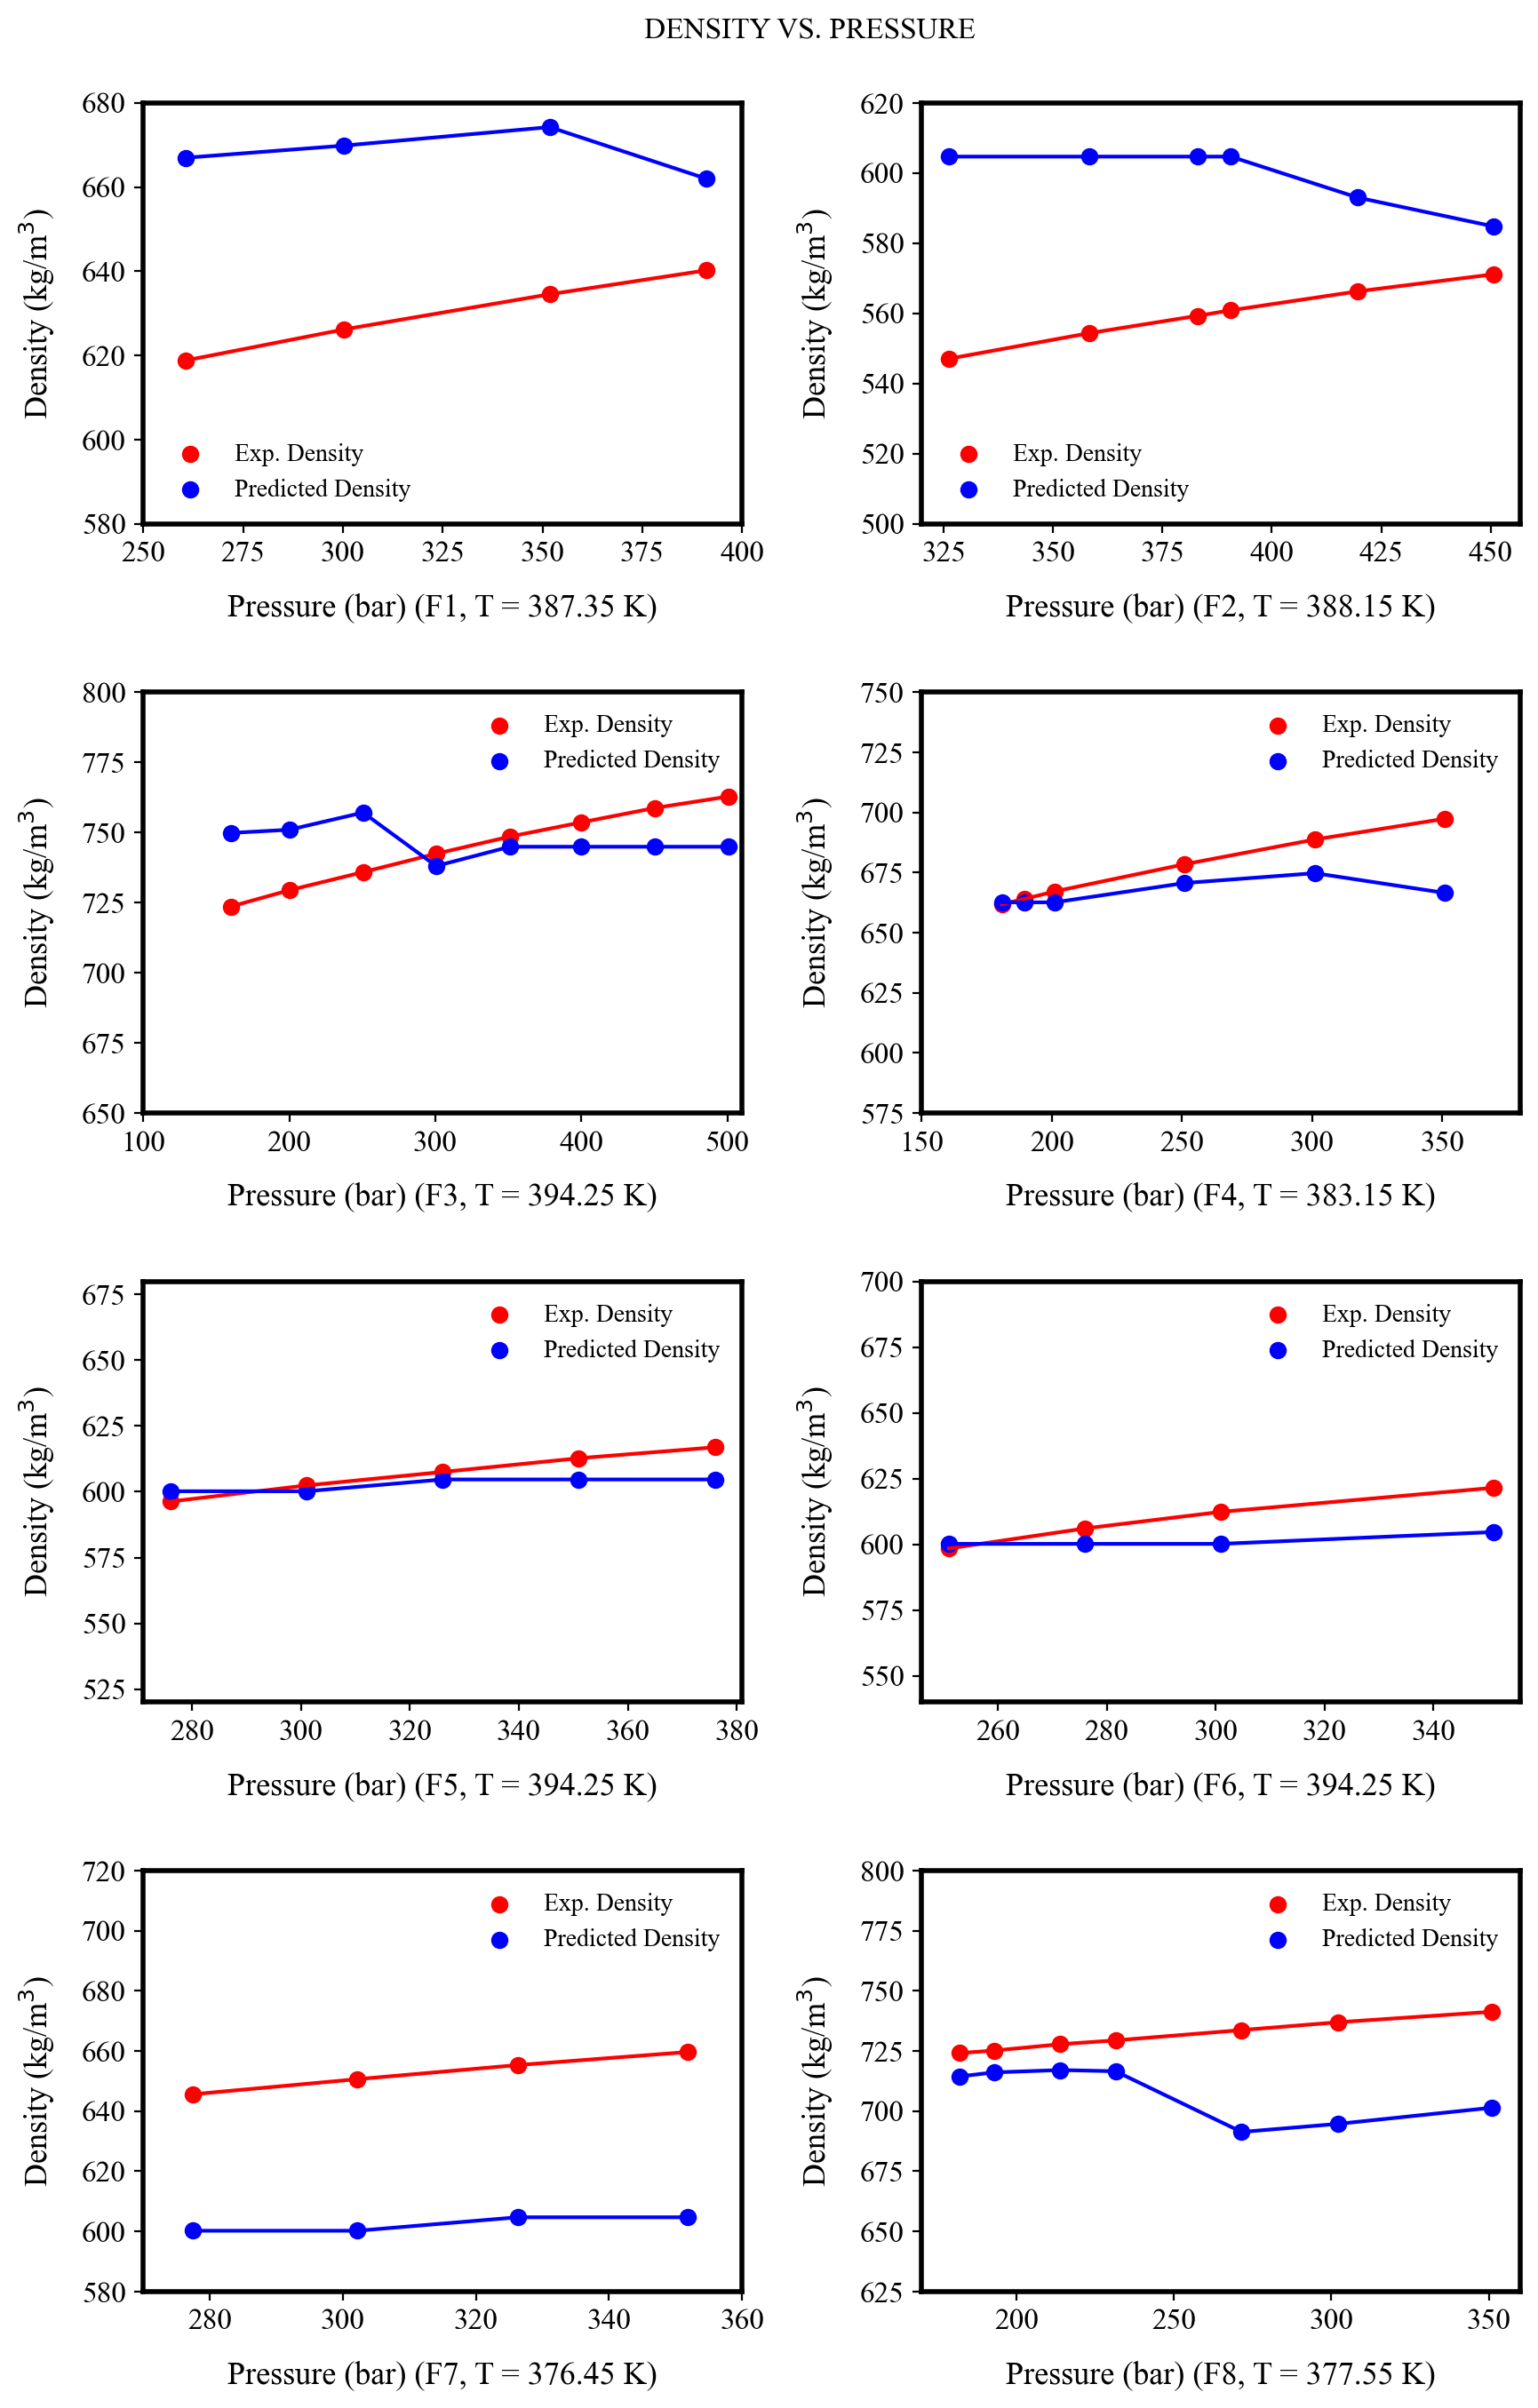

In [49]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
fig2 = plt.figure(figsize=(10,16) , dpi = 200)
plt.suptitle("DENSITY VS. PRESSURE" , fontsize = 12 , c = "black", y=0.91)

for i,j in enumerate(Ref_name_list , 1):
    locals()["ax"+str(i)] = plt.subplot(4,2,i)
    plt.scatter(knn_test_result[knn_test_result["Ref. Name"] == j]["P"],knn_test_result[knn_test_result["Ref. Name"] == j]["Density"],c = "red",label = "Exp. Density")
    plt.plot(knn_test_result[knn_test_result["Ref. Name"] == j]["P"],knn_test_result[knn_test_result["Ref. Name"] == j]["Density"],c = "red")
    plt.scatter(knn_test_result[knn_test_result["Ref. Name"] == j]["P"],knn_test_result[knn_test_result["Ref. Name"] == j]["Density Predicted"],c = "blue",label = "Predicted Density")
    plt.plot(knn_test_result[knn_test_result["Ref. Name"] == j]["P"],knn_test_result[knn_test_result["Ref. Name"] == j]["Density Predicted"],c = "blue")
    plt.legend(fontsize = 8)
  
    #plt.ylim((round(min(svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"])-50), round(max(svr_test_result[svr_test_result["Ref. Name"] == j]["Density"])+50)))
    #plt.yticks((min(svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"])-50, max(svr_test_result[svr_test_result["Ref. Name"] == j]["Density"])+50))
    #plt.xlim((min(svr_test_result[svr_test_result["Ref. Name"] == j]["P"])-5, max(svr_test_result[svr_test_result["Ref. Name"] == j]["P"])+5))

    plt.xlabel("Pressure (bar)" + " " + "(F" + str(i)+"," +" " + "T = " + str(svr_test_result[svr_test_result["Ref. Name"] == j][["Temp"]].values[0][0]) + " K)", fontsize = 13,labelpad = 10)
    plt.ylabel("Density (kg/m$^{3}$)",fontsize = 13,labelpad = 10)
    plt.legend(frameon=False )
    
#Changing Border thickness of all subplots
for i in range(1,9,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)

ax1.set_xlim(250,400)


#ax2.set_xlim(0.0,0.06)


ax3.set_xlim(100,510)


ax4.set_xlim(150,380)


#ax5.set_xlim(0,0.6)


#ax6.set_xlim(0,0.4)


ax7.set_xlim(270,360)


ax8.set_xlim(170,360)

##Set y limit for axis ##

ax1.set_ylim(580,680)


ax2.set_ylim(500,620)


ax3.set_ylim(650,800)


ax4.set_ylim(575,750)


ax5.set_ylim(520,680)


ax6.set_ylim(540,700)


ax7.set_ylim(580,720)


ax8.set_ylim(625,800)
        
plt.subplots_adjust(wspace=0.3,hspace = 0.4)  

fig2.savefig(figure_path + "knnJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


## 3. Visulization of Result with XGB

In [45]:
xgb_test_result = test[["P","Density","Ref. Name"]]
xgb_test_result["Density Predicted"] = result_xgb_test["Predicted Density (test)"]

<ipython-input-45-1cb52a3d63f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xgb_test_result["Density Predicted"] = result_xgb_test["Predicted Density (test)"]


In [46]:
Ref_name_list = xgb_test_result["Ref. Name"].unique()

<ipython-input-50-5f6b573ab248>:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig3.savefig(figure_path + "xgbjubart.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-50-5f6b573ab248>:80: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig3.savefig(figure_path + "xgbjubart.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


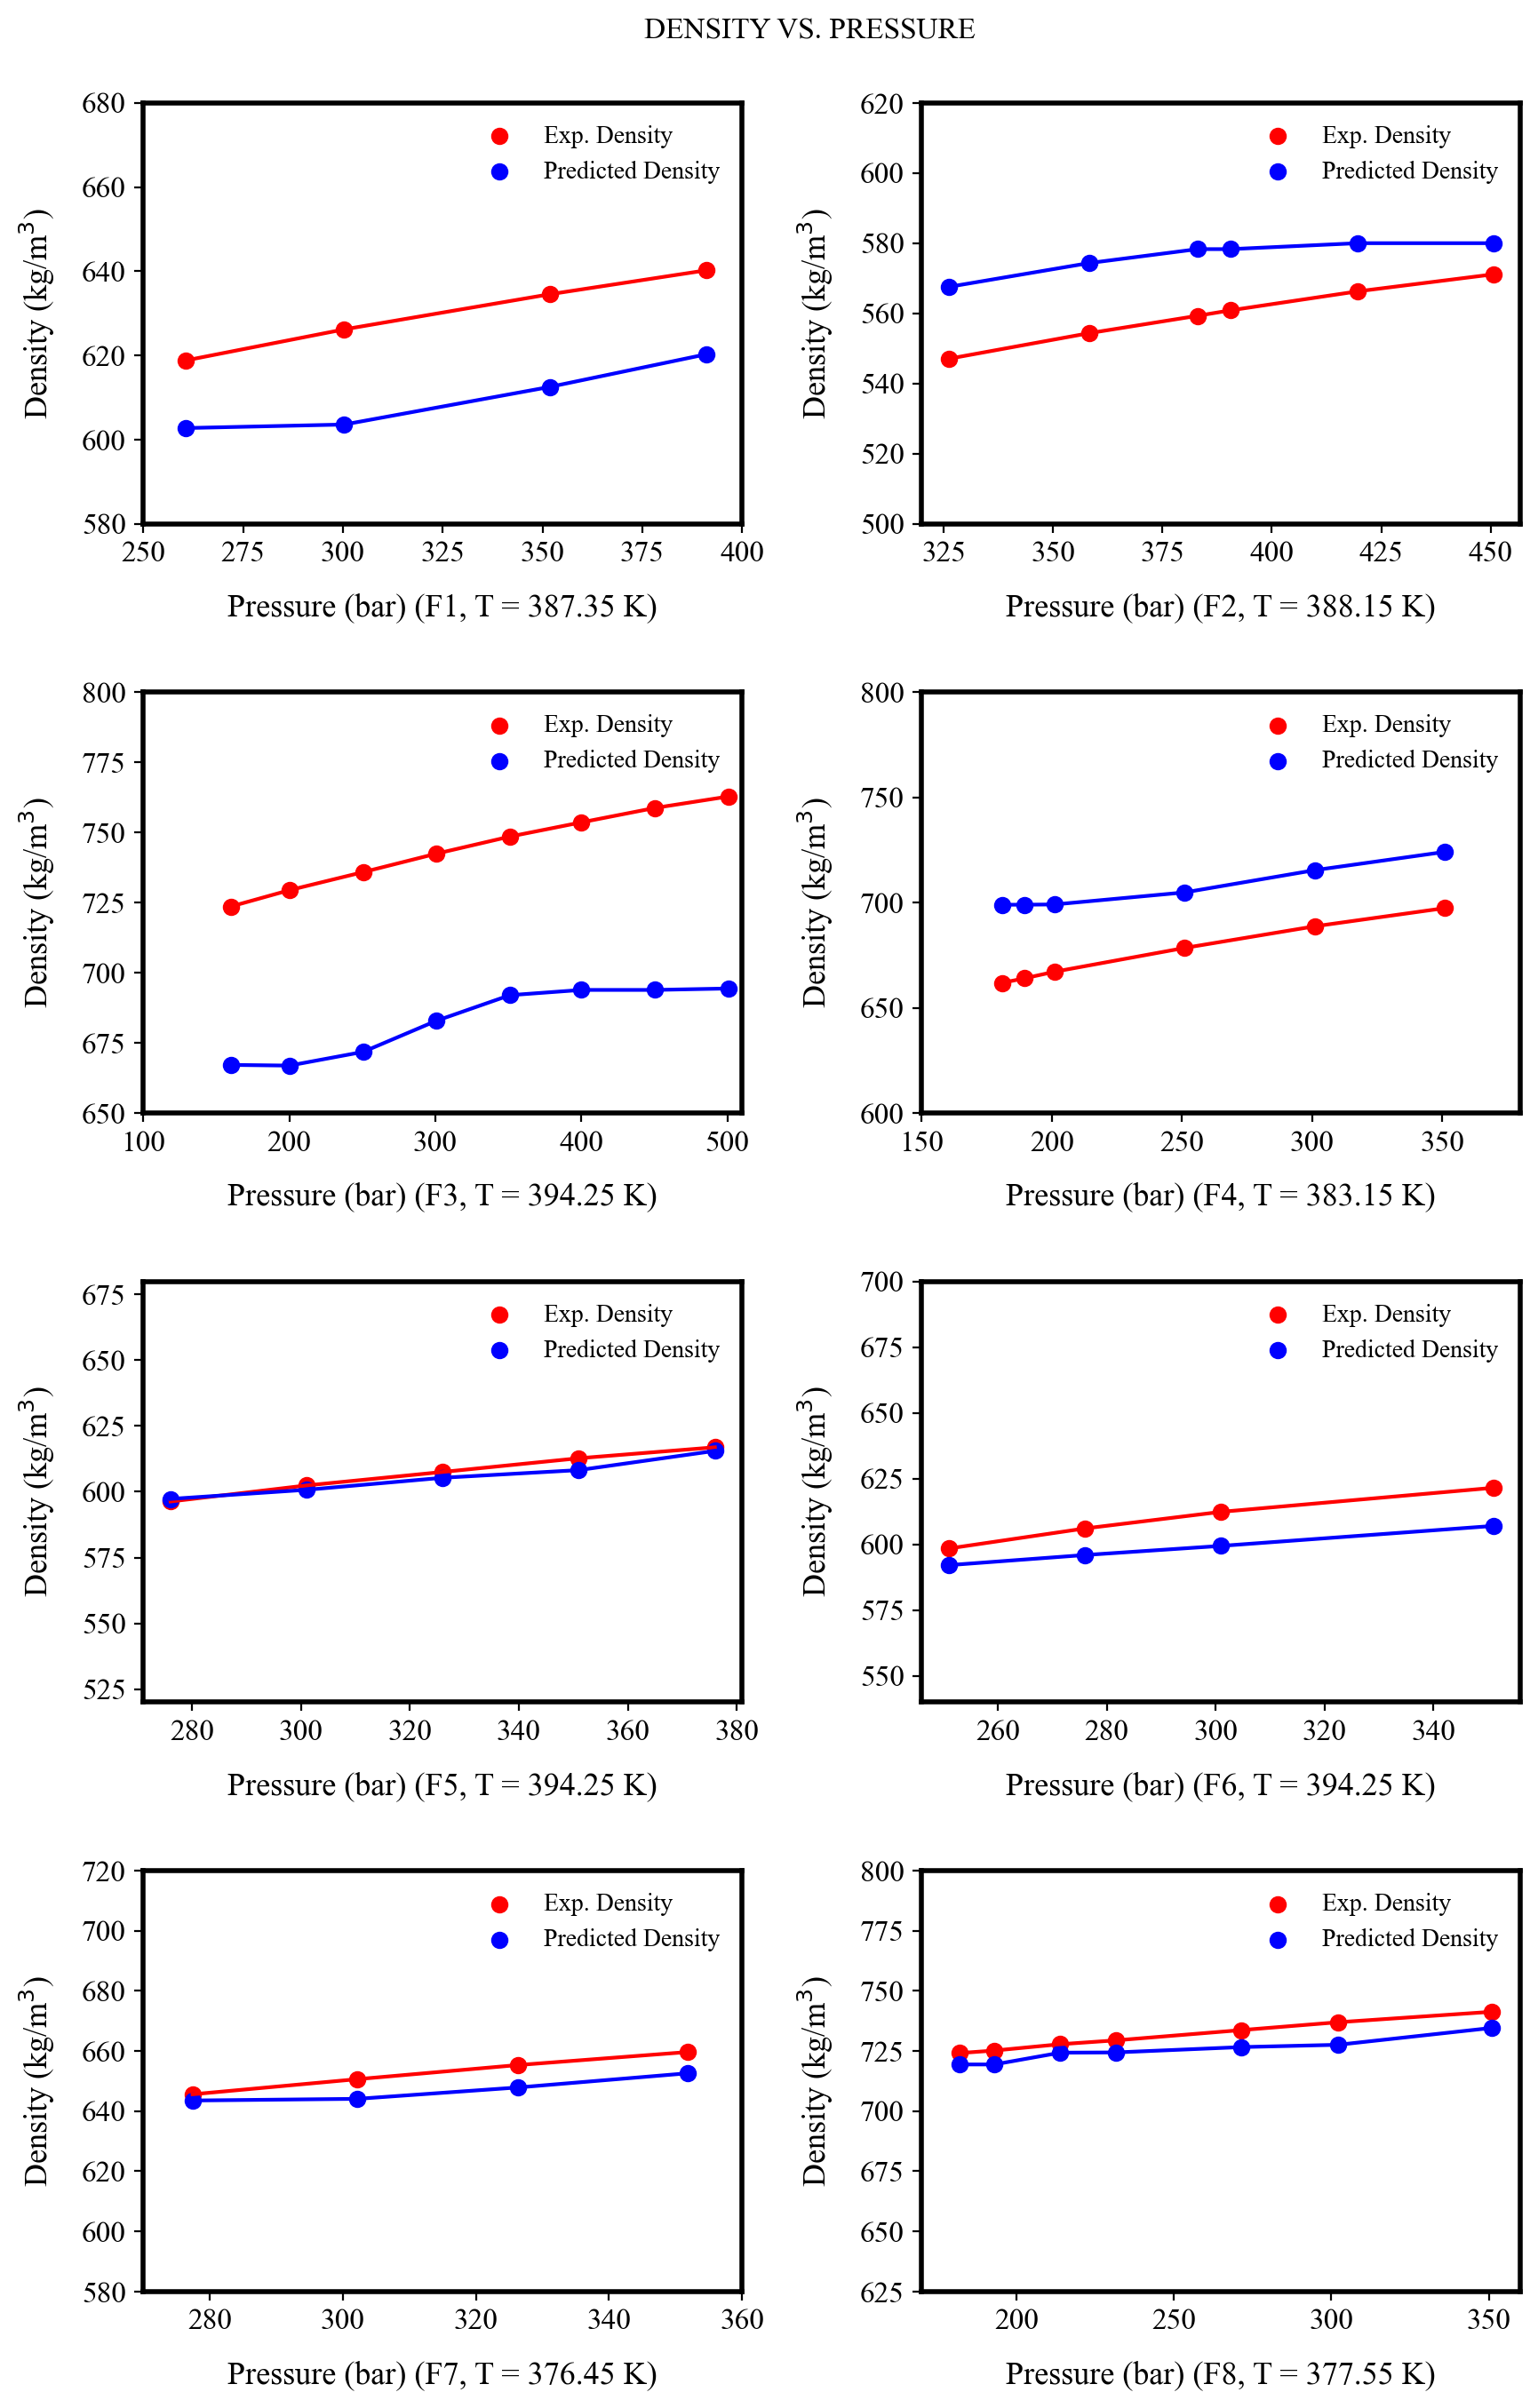

In [50]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
fig3 = plt.figure(figsize=(10,16) , dpi = 200)
plt.suptitle("DENSITY VS. PRESSURE" , fontsize = 12 , c = "black", y=0.91)

for i,j in enumerate(Ref_name_list , 1):
    locals()["ax"+str(i)] = plt.subplot(4,2,i)
    plt.scatter(xgb_test_result[xgb_test_result["Ref. Name"] == j]["P"],xgb_test_result[xgb_test_result["Ref. Name"] == j]["Density"],c = "red",label = "Exp. Density")
    plt.plot(xgb_test_result[xgb_test_result["Ref. Name"] == j]["P"],xgb_test_result[xgb_test_result["Ref. Name"] == j]["Density"],c = "red")
    plt.scatter(xgb_test_result[xgb_test_result["Ref. Name"] == j]["P"],xgb_test_result[xgb_test_result["Ref. Name"] == j]["Density Predicted"],c = "blue",label = "Predicted Density")
    plt.plot(xgb_test_result[xgb_test_result["Ref. Name"] == j]["P"],xgb_test_result[xgb_test_result["Ref. Name"] == j]["Density Predicted"],c = "blue")
    plt.legend(fontsize = 8)
  
    #plt.ylim((round(min(svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"])-50), round(max(svr_test_result[svr_test_result["Ref. Name"] == j]["Density"])+50)))
    #plt.yticks((min(svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"])-50, max(svr_test_result[svr_test_result["Ref. Name"] == j]["Density"])+50))
    #plt.xlim((min(svr_test_result[svr_test_result["Ref. Name"] == j]["P"])-5, max(svr_test_result[svr_test_result["Ref. Name"] == j]["P"])+5))

    plt.xlabel("Pressure (bar)" + " " + "(F" + str(i)+"," +" " + "T = " + str(svr_test_result[svr_test_result["Ref. Name"] == j][["Temp"]].values[0][0]) + " K)", fontsize = 13,labelpad = 10)
    plt.ylabel("Density (kg/m$^{3}$)",fontsize = 13,labelpad = 10)
    plt.legend(frameon=False )
    
#Changing Border thickness of all subplots
for i in range(1,9,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)

ax1.set_xlim(250,400)


#ax2.set_xlim(0.0,0.06)


ax3.set_xlim(100,510)


ax4.set_xlim(150,380)


#ax5.set_xlim(0,0.6)


#ax6.set_xlim(0,0.4)


ax7.set_xlim(270,360)


ax8.set_xlim(170,360)

##Set y limit for axis ##

ax1.set_ylim(580,680)


ax2.set_ylim(500,620)


ax3.set_ylim(650,800)


ax4.set_ylim(600,800)


ax5.set_ylim(520,680)


ax6.set_ylim(540,700)


ax7.set_ylim(580,720)


ax8.set_ylim(625,800)
        
plt.subplots_adjust(wspace=0.3,hspace = 0.4)  

fig3.savefig(figure_path + "xgbjubart.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
